# Week 11 - 군집화 (Clustering)
: 유사성이 높은 데이터들을 동일 그룹으로 분류하고 서로 다른 군집들이 상이성을 갖도록 그룹화 하는 것

- [KMeans](https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)
- [Mean Shift](https://en.wikipedia.org/wiki/Mean_shift)
- [Gaussian Misxutre Model](https://ko.wikipedia.org/wiki/%ED%98%BC%ED%95%A9_%EB%AA%A8%EB%8D%B8)
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN)

## [KMeans](https://angeloyeo.github.io/2021/02/07/k_means.html)
: 군집 중심점 (centroid) 기반 알고리즘

<b> 장점 </b>
- 알고리즘이 쉽고 간결하다.
- 대용량 데이터에서도 활용 가능

<b> 단점 </b>
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우, 군집화 정확도가 떨어짐
- 반복을 수행하는데 반복 횟수가 많을 경우 수행시간이 길다
- 이상치에 취약하다.

In [1]:
# 라이브러리와 데이터 불러오기
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

sns.set(color_codes=True)

In [2]:
iris  = load_iris()

irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
# KMeans 객체 생성
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
# label 출력
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [5]:
# label 값을 cluster 변수에 할당
irisDF['cluster'] = kmeans.labels_

In [6]:
# target과 cluster 비교
irisDF['target'] = iris['target']
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


cluster는 임의로 번호를 부여하므로 target과 값이 일치하지 않는다고 해서 틀린 것이 아니다!

In [7]:
from sklearn.decomposition import PCA

# pca
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[: ,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


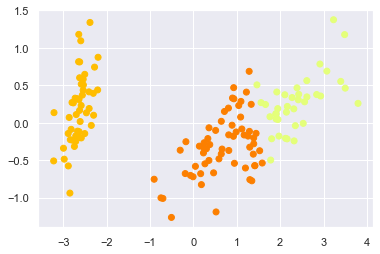

In [8]:
plt.scatter(x = irisDF.loc[:, 'pca_x'], y = irisDF.loc[:, 'pca_y'], c = irisDF['cluster'], cmap = 'Wistia')
plt.show()

## 평가 Evaluation 

### 실루엣 Silhouette
: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄.실루엣 계수를 기반으로 한다. 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표이다.

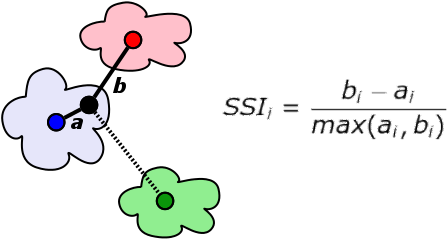

In [9]:
Image('img/silhouetee coeffiicent.PNG')

- a는 자신이 속한 클러스터내의 다른 데이터 포인트들의 거리 평균 (a = mean(a12, a13, a14))

- b는 가장 가까운 다른 클러스터 내의 다른 데이터 포인트들의 거리 평균 (b = mean(b15, b16, b17, b18)

- 두 군집 간의 거리가 얼마나 떨어져있는가를 구하는 것은 b - a이며, 이를 정규화해주기 위해 max(a, b)로 나눠준다.

실루엣 계수는 -1과 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다. -값은 아예 다른 군집에 데이터 포인트가 할당됐음을 의미한다.

In [10]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
import math

kmeans = KMeans(n_clusters=3, max_iter = 300, random_state = 0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


In [11]:
# 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhoette_samples () return 값의 shape', score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

silhoette_samples () return 값의 shape (150,)


In [12]:
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755,0.849302
5,5.4,3.9,1.7,0.4,0,0,-2.280860,0.741330,0.748280
6,4.6,3.4,1.4,0.3,0,0,-2.820538,-0.089461,0.821651
7,5.0,3.4,1.5,0.2,0,0,-2.626145,0.163385,0.853905
8,4.4,2.9,1.4,0.2,0,0,-2.886383,-0.578312,0.752150
9,4.9,3.1,1.5,0.1,0,0,-2.672756,-0.113774,0.825294


In [13]:
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('iris 데이터의 평균 실루엣 스코어: ', round(average_score, 3))

iris 데이터의 평균 실루엣 스코어:  0.553


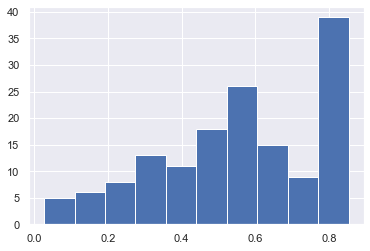

In [14]:
irisDF['silhouette_coeff'].hist()
plt.show()

In [15]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhouette_coeff, dtype: float64

하지만 전체 실루엣 계수의 평균값과 개별 군집의 평균값의 편차가 크지 않아야 좋은 군집 기준이다. 만약 전체 실루엣 계수의 평균값은 높아서  살펴보니 특정 군집의 실루엣 계수의 평균값만 유난히 높고, 다른 군집들의 실루엣 계수 평균값이 낮으면 좋은 군집화 조건이 아닌 것이다. 사이킷런에서 제공하는 예제를 통해 확인해보자.

In [16]:
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

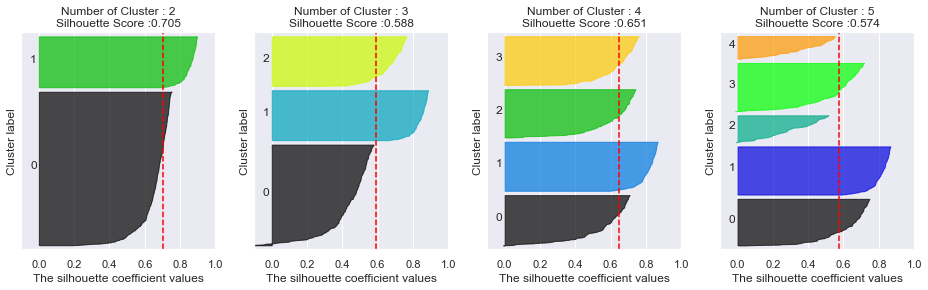

In [17]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

실루엣 계수의 평균은 n_cluster가 2일 때가 가장 높지만, n_cluster가 4일 때 가장 좋은 분포를 보인다.

## Mean Shift
: KDE(커널밀도함수)를 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행하는 방법. 별도의 군집화 개수를 지정하지 않으면 Mean Shift는 데이터 분포도에 기반하여 자동으로 군집화 개수를 정한다.

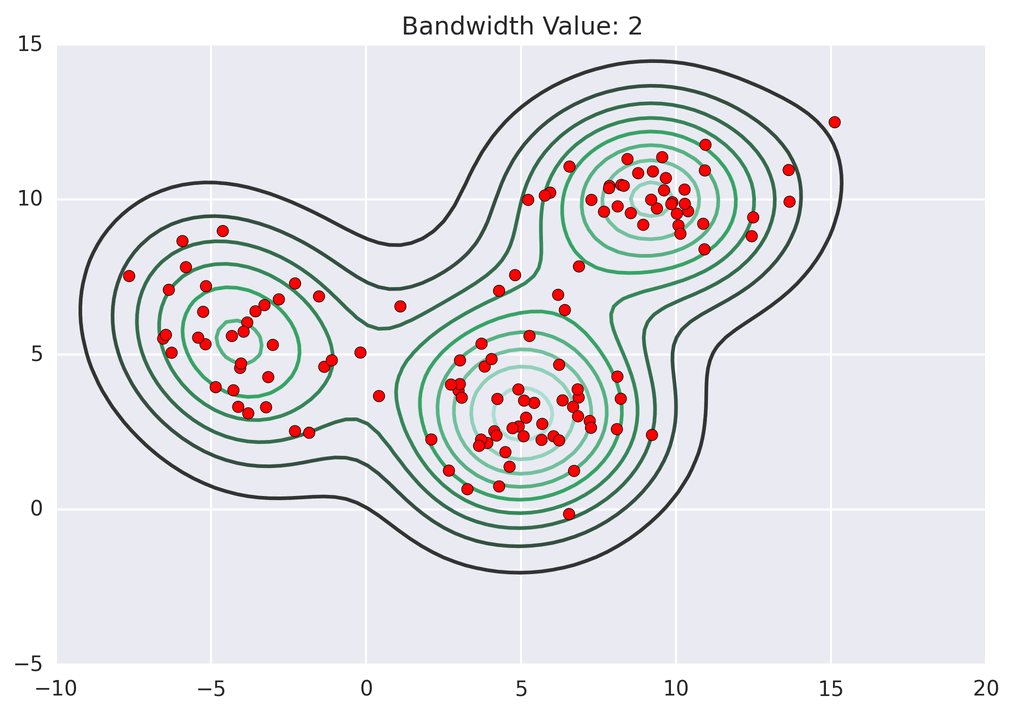

In [18]:
# Mean Shift 애니메이션
Image('img/mean shift.gif')

1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 계산
2.  데이터 분포도가 높은 방향으로 중심점 이동
3. 중심점을 따라 해당 데이터 이동
4. 이동된 데이터의 특정 반경 내에 다시 데이터 분포 계산 후, 2.3번을 반복
5. 가장 분포도가 높은 곳으로 이동하면 더 이상 해당 데이터는 움직이지 않고 수렴
6. 모든 데이터를 1~5까지 수행하며 군집 중심점을 찾는다.

Bandwidth가 클수록 적은 수의 군집 중심점을, Bandwidth가 작을수록 많은 수의 군집 중심점을 가지게 된다. 또한 Mean Shift는 군집의 개수를 지정하지 않으며, 오직 Bandwith의 크기에 따라 군집화를 수행한다. 또한 MeanShift 알고리즘은 Bandwidth 값에 민감하다는 단점이 있다.

In [19]:
# make_blobs()를 이용해 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고, Meanshift를 이용해 군집화 수행
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, 
                  cluster_std = 0.8, random_state = 0)

meanshift = MeanShift(bandwidth = 0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형: ', np.unique(cluster_labels))

cluster labels 유형:  [0 1 2 3 4 5 6 7]


In [20]:
# 3개의 center가 나오지 않았으므로, bandwidth를 1로 증가하여 군집화 재수행
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:' , np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [21]:
# 최적의 bandwidth 값 구하기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile = 0.25) # 샘플링의 데이터 개수
print('최적의 Bandwidth 값: ', round(bandwidth, 3))

최적의 Bandwidth 값:  1.689


In [22]:
# 데이터프레임으로 만듦
clusterDF = pd.DataFrame(data = X, columns = ['ftr1' ,'ftr2'])
clusterDF['target'] = y

# 최적의 bandwidth  계산
best_bandwidth = estimate_bandwidth(X, quantile = 0.25)

meanshift = MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형: ', np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


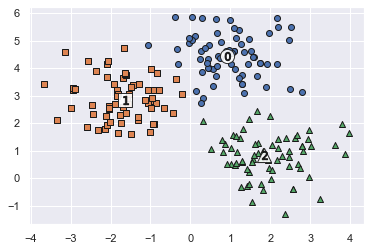

In [23]:
clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

In [24]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64


## [GMM](https://angeloyeo.github.io/2021/02/08/GMM_and_EM.html) (Gaussian Mixture Model)
: 선형적인 데이터 분포가 보인다면 KMeans를 통해 군집화 하기는 어려움이 있다. GMM은 군집 중심점을 기반으로 한 KMeans 알고리즘의 문제점을 해결해준다. GMM은 군집화를 적용하고자 하는 데이터가 여러 개의 다른 정규분포를 가진 모델이라 가정하고 군집화를 수행한다.

In [25]:
# 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        # DBSCAN
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 중심점이 있는 KMeans의 경우
        if iscenter: 
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

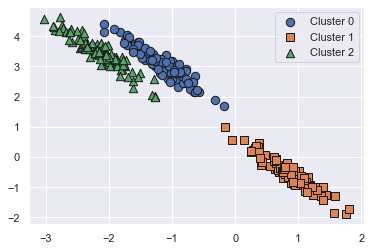

In [26]:
# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

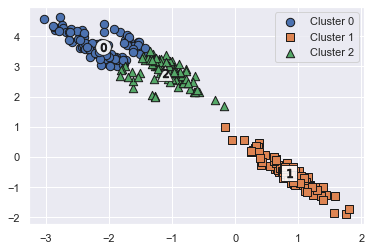

In [27]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

KMeans 알고리즘은 중심점을 기반으로 군집을 나누기 때문에 cluster 0과 cluster 2가 혼재되어 있다. 

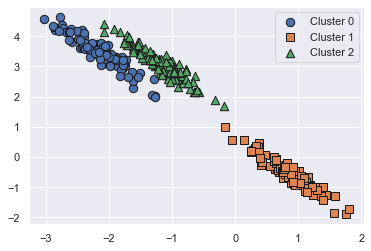

In [28]:
from sklearn.mixture import GaussianMixture

# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

반면 GMM의 경우, 기하학적으로 군집이 잘 형성된 모습을 보인다.

In [29]:
# iris 데이터 불러오기
iris  = load_iris()

irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [30]:
gmm = GaussianMixture(n_components=3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF의 gmm_cluster 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels

# target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


versicolor와 virginica가 조금 섞여있으므로 이전의 KMeans와 비교해봤을 때, GMM의 성능이 더 좋게 나오는 것을 확인 할 수 있다.

## DBSCAN (Density Based Spatial Clustering of Applications with Noise)
: 특정 공간 내에 데이터 밀도 차이 기반 알고리즘으로 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.

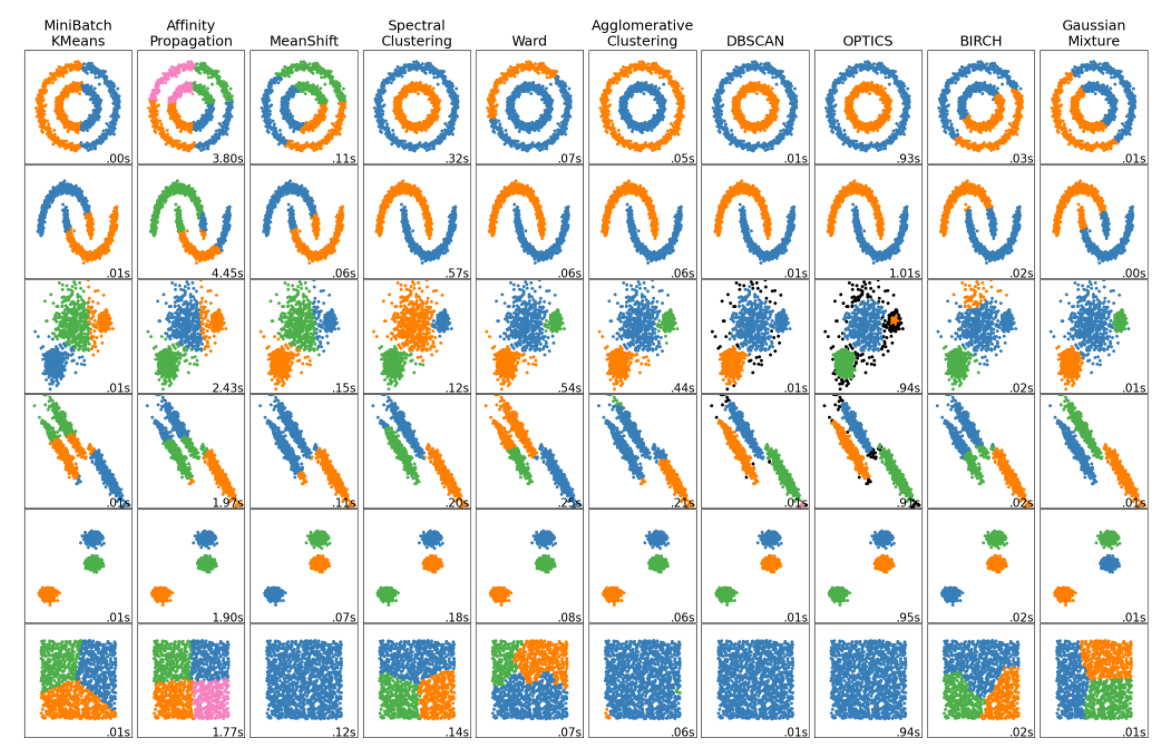

- DBSCAN은 밀도가 자주 변하거나, 아예 모든 데이터의 밀도가 크게 변하지 않으면 성능이 떨어진다.
- feature의 개수가 많으면 성능이 떨어진다.

### parameter
- 입실론(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수이다.

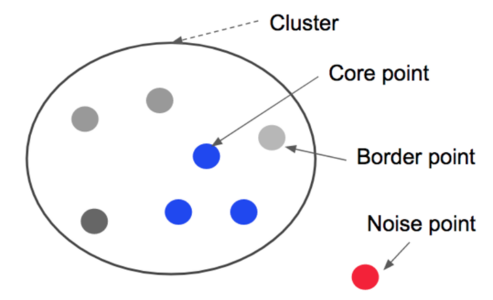

In [31]:
Image('img/dbscan point.png')

- Core point : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 갖고 있는 경우, core point(핵심 포인트)라고 함
- Neighbor point : 주변 영역 내에 위치한 다른 데이터를 Neighbor point(이웃 포인트)라고 함. 여기서는 회색 점들이 Neighbor point임.
- Border point : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 갖고 있지는 않지만 핵심 포인트를 이웃포인트로 하고 있는 데이터를 Border point(경계 포인트)라고 함.
- Noise point : 최소 데이터 개수 이상의 이웃포인트를 갖고 있고, 핵심 포인트도 이웃 포인트도 없는 데이터를 Noise point(잡음 포인트)라고 함.

In [32]:
# iris 데이터 불러오기
iris  = load_iris()

irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [33]:
# esp = 0.6, min_samples = 8로 DBSCAN 구현
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples=8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


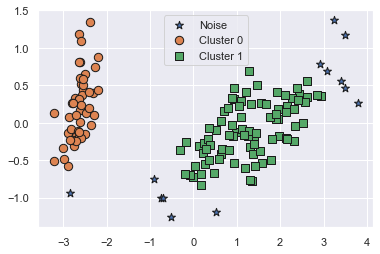

In [34]:
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


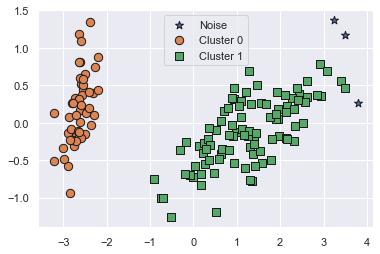

In [35]:
# esp의 크기를 증가시켜 노이즈를 감소시킴
dbscan = DBSCAN(eps = 0.8, min_samples=8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

반대로 min_samples를 증가하면 노이즈가 많아짐.